In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [2]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 
from  scipy.stats import norm
from scipy import stats as stats
from numpy import array

In [3]:
 len(tp3)

12829

In [4]:
 len(tp4)

11681

In [5]:
def reli( pred, y ):
    figure (figsize=(2.5,2.5))
    a =  array([0  , 0.1 , .15,  0.2 , .25,  0.3 , .35,  0.4 , .45,0.5 ,    0.6 ,   0.7 ,  0.8 ,  0.9 ,   1 ])
    mli.plot_reliability_diagram( pred,   y, 
                                 bins = a)

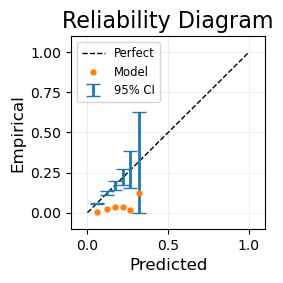

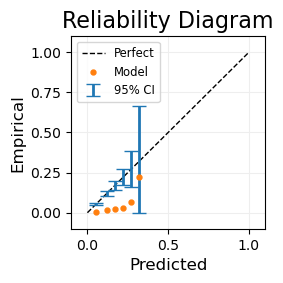

In [6]:
reli(M_test3['golds'], tp3)
reli(M_test4['golds'], tp4)

In [7]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [73]:
def w_iso (pos, subneg, p_test, synth_size):

    mu, sig = norm.fit (logit(pos))
    synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
    #a, b, loc, scale = beta.fit(pos ,  floc=0.02, fscale=.78)
    #synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, expit(synth_pos)))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    
    logi =  LogisticRegression( #class_weight='balanced',
                               solver = 'liblinear', penalty = 'l1')  #(out_of_bounds = 'clip')
    logi.fit(  logit(probs).reshape(-1,1), subgold) #, sample_weight = weights)
    logi_prob = logi.predict_proba(   logit (probs).reshape(-1,1) ) [:,1]

   # weights = np.where (subgold==1, logi_prob , 1) 
    weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob ) 
    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(    (probs), subgold, sample_weight = weights)            #iso.fit_transform ( logit(probs), subgold) 
    iso_test = iso.predict(     ( p_test)  )
    return iso_test

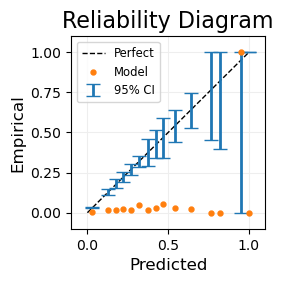

In [77]:
I3 = []
for i in range(100):
    I3.append(w_iso(pos_3,  np.random.choice(neg_3, 20*sum(gold3)), p_test=tp3 , synth_size =5 ))
IM3 = np.array( [l for l in I3])
MaxI3 =  np.quantile( IM3, .5, axis=0)
reli(M_test3['golds'],   ( MaxI3))

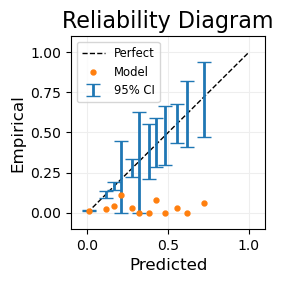

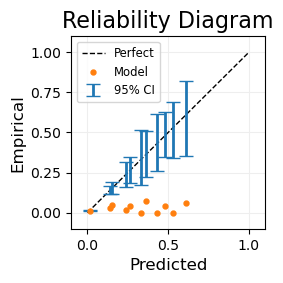

In [15]:
reli(M_test3['golds'],   IM3.mean(0))
reli(M_test3['golds'],  np.quantile( IM3, .25, axis=0))

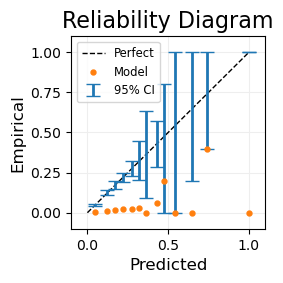

In [66]:
I4 = []
for i in range(100):
    I4.append(w_iso(pos_4, subneg=np.random.choice(neg_4, 100*sum(gold4)), p_test = tp4 ,  synth_size=20 ))
IM4 = np.array( [l for l in I4])
MaxI4 =  np.quantile( IM4, .5, axis=0)
reli(M_test4['golds'],   ( MaxI4))

In [67]:
pd.DataFrame(IM3).to_csv('Cali_Mats/M3_Cali_Normal.csv') 
pd.DataFrame(IM4).to_csv('Cali_Mats/M4_Cali_Normal.csv') 

In [ ]:
Trim3_b = stats.tmean (IM3, (.05, .95), axis=0)

In [57]:
from scipy import stats as stats

In [58]:

Trim3 = stats.trim_mean (IM3, .05 )

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_stats_py.py:610: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis)


{'pred_probs': array([0.02147   , 0.0598049 , 0.11614708, 0.17159956, 0.21945733,
        0.26809008, 0.32121354, 0.3682044 , 0.40125645, 0.59351885,
        1.        ]),
 'emp_probs': array([0.01178619, 0.03977733, 0.08641975, 0.05405405, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'bin_counts': array([6.024e+03, 9.880e+03, 1.620e+02, 3.700e+01, 7.000e+00, 9.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 2.000e+00])}

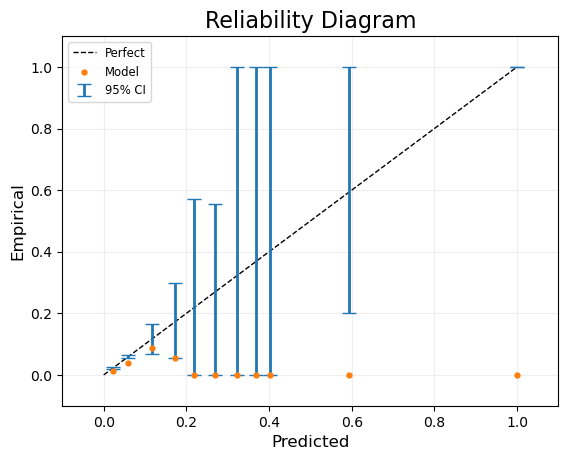

In [83]:
Q1_80 = np.quantile(IM1, .80, axis=0  )
mli.plot_reliability_diagram(M_test1['golds'],  Q1_80)

{'pred_probs': array([0.01565486, 0.0752152 , 0.11894182, 0.17967397, 0.21172599,
        0.27230198, 0.31553975, 0.35507692, 0.43428571, 0.5       ,
        0.64172653, 0.72678552, 0.77819057, 0.82121212, 1.        ]),
 'emp_probs': array([0.00497288, 0.01902562, 0.03423423, 0.04166667, 0.0952381 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'bin_counts': array([4.424e+03, 9.093e+03, 5.550e+02, 9.600e+01, 2.100e+01, 1.300e+01,
        9.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00])}

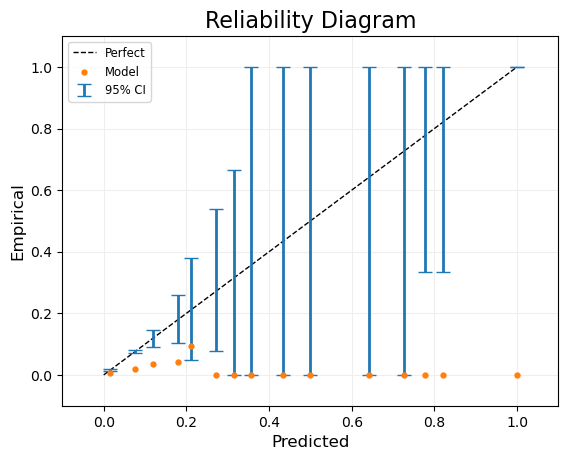

In [82]:
Q2_80 = np.quantile(IM2, .80, axis=0  )
mli.plot_reliability_diagram(M_test2['golds'],  Q2_80)

In [97]:
def w_iso2 (pos, subneg, p_test, synth_size):

    #mu, sig = norm.fit (logit(pos))
    synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))
    #a, b, loc, scale = beta.fit(pos )#,  floc=0, fscale=1)
    #synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, expit(synth_pos)))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    
    logi =  LogisticRegression( class_weight='balanced',
                               solver = 'liblinear', penalty = 'l1'
                               )  #(out_of_bounds = 'clip')
    logi.fit(  logit(probs).reshape(-1,1), subgold) #, sample_weight = weights)
    logi_prob = logi.predict_proba(   logit (probs).reshape(-1,1) ) [:,1]

   # weights = np.where (subgold==1,  logi_prob , 1) 
    #weights = np.where (subgold==1,  logi_prob , 1-logi_prob) 
    weights = np.where (subgold==1,  1/(1-logi_prob),1/logi_prob ) 
    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(    (probs), subgold, sample_weight = weights)            #iso.fit_transform ( logit(probs), subgold) 
    iso_test = iso.predict(     ( p_test)  )
    return iso_test

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1)

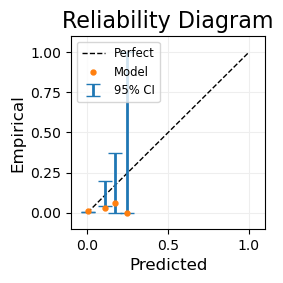

In [98]:
I3 = []
for i in range(100):
    I3.append(w_iso2(pos_3,  np.random.choice(neg_3, 50*sum(gold3)), p_test=tp3 , synth_size =20 ))
IbM3 = np.array( [l for l in I3])
MaxI3 =  np.quantile( IbM3, .5, axis=0)
reli(M_test3['golds'],   ( MaxI3))

In [ ]:
reli(M_test3['golds'],   ( MaxI3))

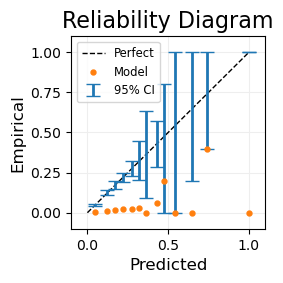

In [ ]:
I4 = []
for i in range(100):
    I4.append(w_iso(pos_4, subneg=np.random.choice(neg_4, 100*sum(gold4)), p_test = tp4 ,  synth_size=20 ))
IbM4 = np.array( [l for l in I4])
MaxI4 =  np.quantile( IbM4, .5, axis=0)
reli(M_test4['golds'],   ( MaxI4))

In [47]:
MedI1 = np.median(IM1, axis = 0)